In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


In [8]:
df = pd.read_csv("./preprocessed_eeg_features.csv")
df['internet_addiction_level'] = df['internet_addiction_level'].replace({'Moderate level': 'Severe Level'})



In [9]:
df.sample(5)

,task1_attention_mean,task1_attention_std,task1_meditation_mean,task1_meditation_std,task1_LowAlpha_mean,task1_LowAlpha_std,task1_LowAlpha_kurtosis,task1_LowAlpha_skewness,task1_LowAlpha_range,task1_LowAlpha_bandpower_sum,...,task11_MiddleGamma_std,task11_MiddleGamma_kurtosis,task11_MiddleGamma_skewness,task11_MiddleGamma_range,task11_MiddleGamma_bandpower_sum,task11_MiddleGamma_spectral_entropy,gender,memory_words_correct,internet_addiction_level,personality
10,46.200000,20.600809,73.983333,16.176621,27674.933333,24889.651552,4.326255,1.867959,124791,1660496,...,4490.013644,10.897078,2.980973,27061,238146,2.693025,Male,12,Mid Level,Agreeableness
11,52.883333,17.364803,61.866667,9.947306,24463.000000,22952.453922,1.480359,1.380175,101116,1467780,...,83410.971354,20.784754,4.628460,460783,1813216,3.691863,Male,6,Mid Level,Neuroticism
27,19.000000,16.457015,65.400000,14.660832,38490.833333,36879.703808,7.618372,2.243984,218369,2309450,...,24630.780182,-0.644076,0.639612,98005,2091948,1.865521,Female,12,Mid Level,Agreeableness
16,44.016667,17.750579,59.583333,17.629796,34568.516667,34066.899736,18.236887,3.653238,234038,2074111,...,12514.128733,1.580438,1.451061,52576,801035,2.483348,Male,10,Severe Level,Extraversion
15,41.716667,15.190010,95.033333,6.387401,91907.450000,62579.670117,2.876679,1.571587,321763,5514447,...,12151.392745,6.613835,2.320129,65831,697799,2.660692,Male,9,Mid Level,Openness


C:\Users\Tanmay Sapra\AppData\Local\Temp\ipykernel_24252\617829388.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="internet_addiction_level", data=df, palette="viridis")


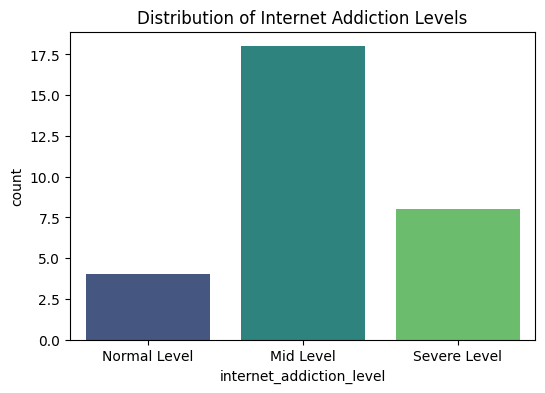

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x="internet_addiction_level", data=df, palette="viridis")
plt.title("Distribution of Internet Addiction Levels")
plt.show()

C:\Users\Tanmay Sapra\AppData\Local\Temp\ipykernel_24252\873945338.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="gender", data=df, palette="coolwarm")


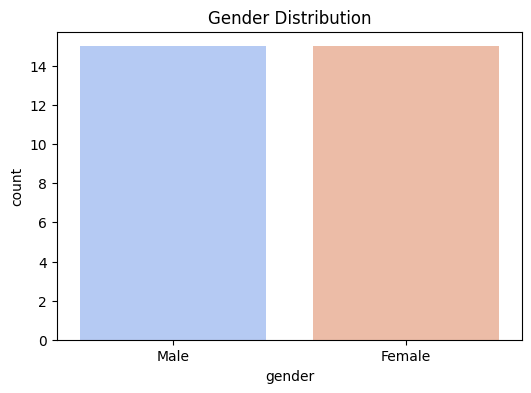

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(x="gender", data=df, palette="coolwarm")
plt.title("Gender Distribution")
plt.show()

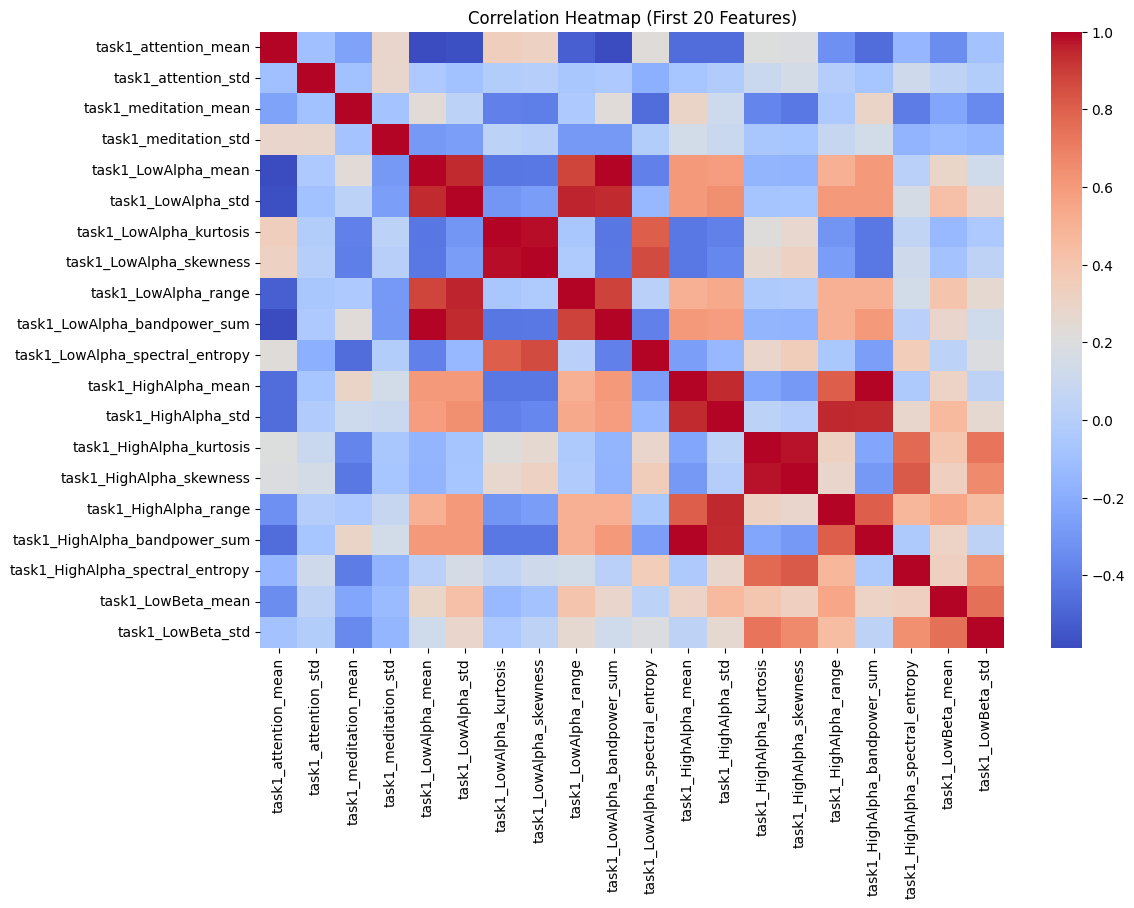

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(df.iloc[:, :20].corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap (First 20 Features)")
plt.show()

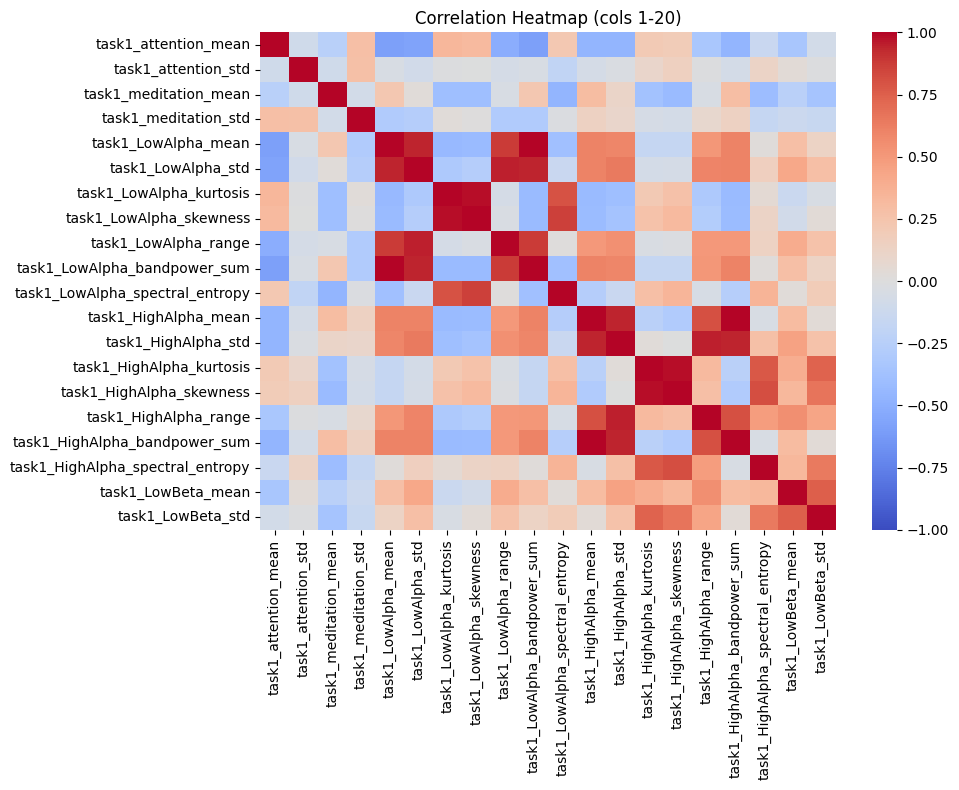

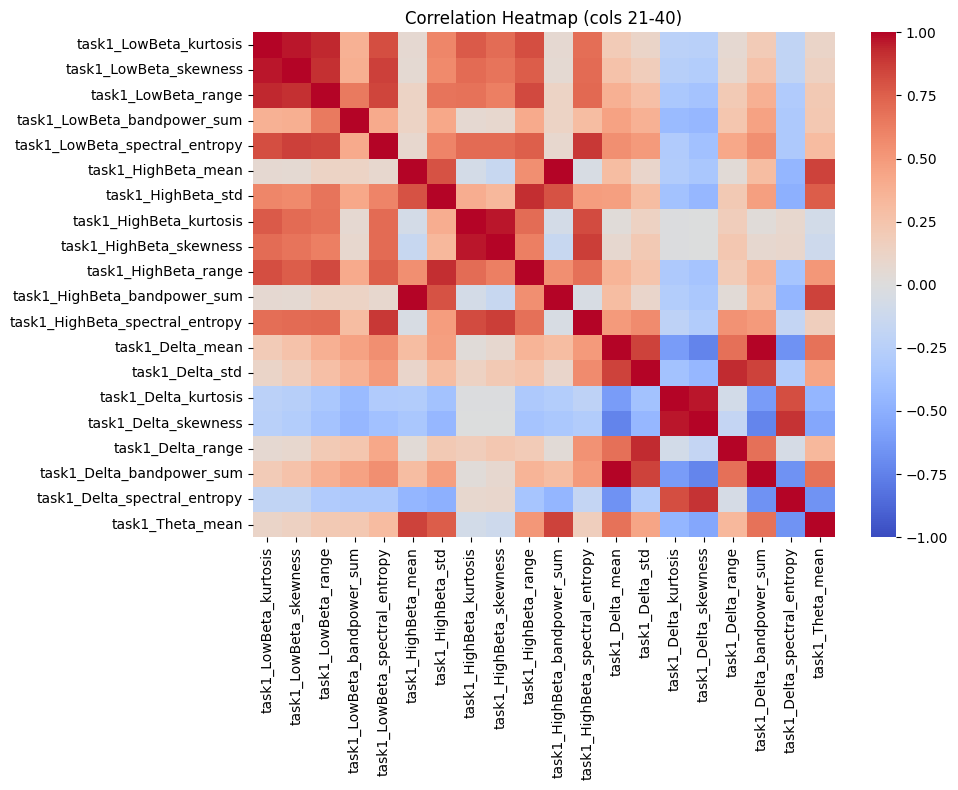

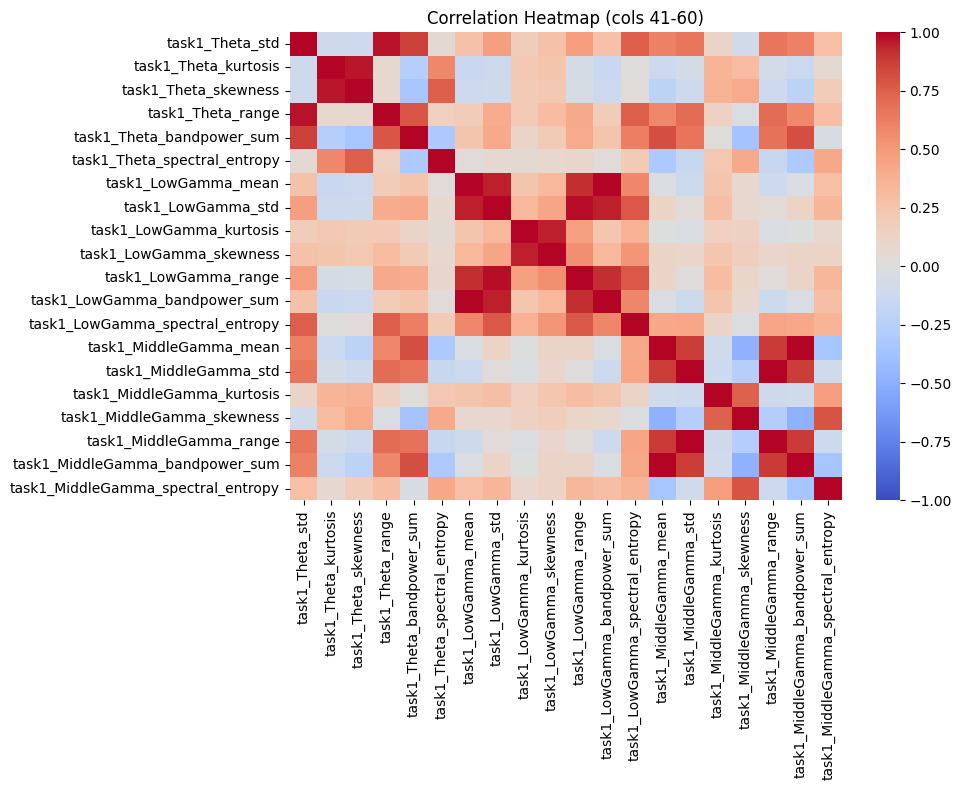

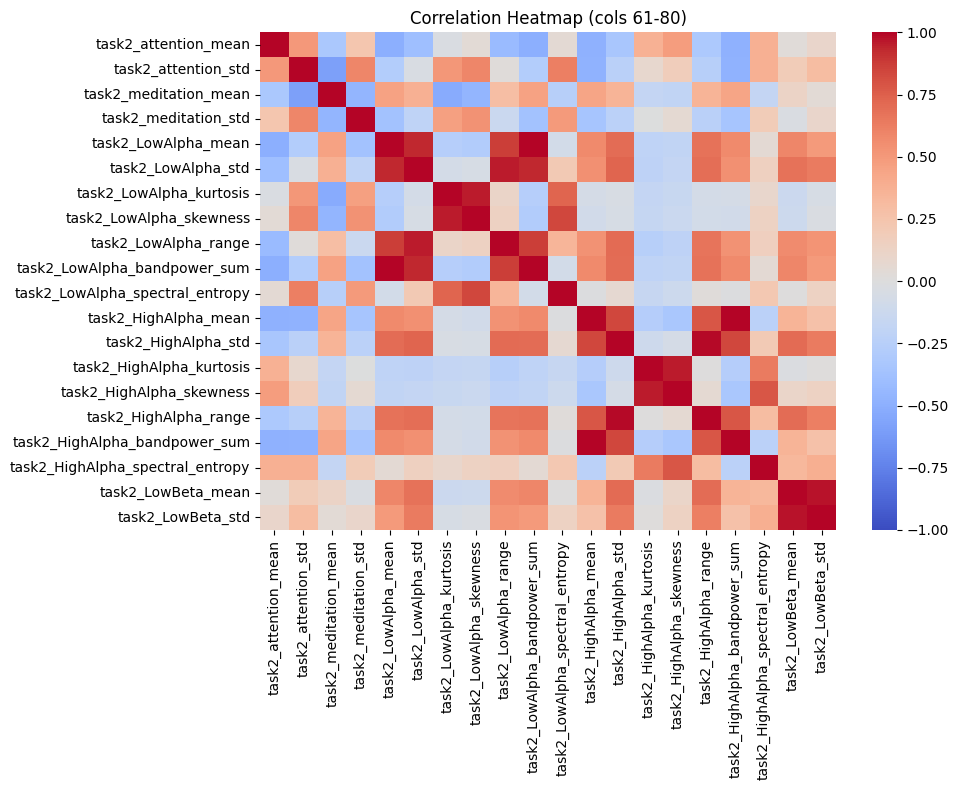

In [15]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
CHUNK = 20
for i in range(0, min(len(num_cols), 80), CHUNK):  # cap to 80 cols = 4 heatmaps
    block = num_cols[i:i+CHUNK]
    plt.figure(figsize=(10,8))
    sns.heatmap(df[block].corr(), vmin=-1, vmax=1, cmap="coolwarm")
    plt.title(f"Correlation Heatmap (cols {i+1}-{i+len(block)})")
    plt.tight_layout()
    plt.show()


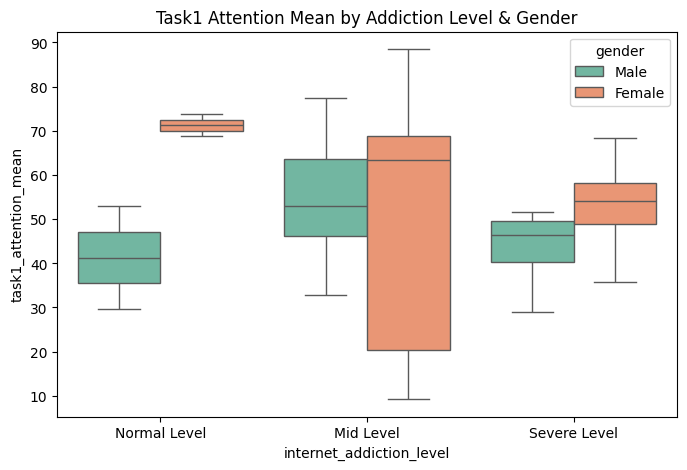

In [16]:
plt.figure(figsize=(8,5))
sns.boxplot(x="internet_addiction_level", y="task1_attention_mean", 
            hue="gender", data=df, palette="Set2")
plt.title("Task1 Attention Mean by Addiction Level & Gender")
plt.show()

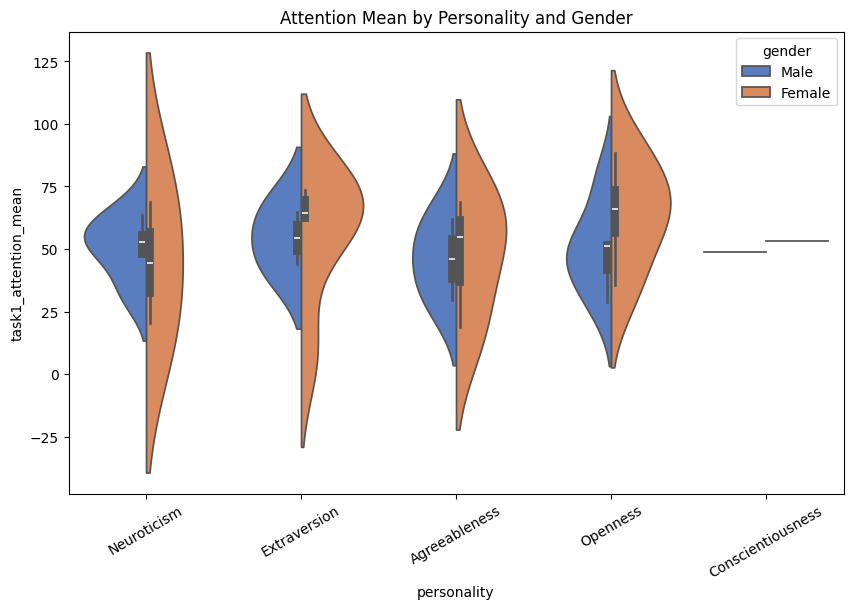

In [17]:
plt.figure(figsize=(10,6))
sns.violinplot(x="personality", y="task1_attention_mean", 
               hue="gender", data=df, split=True, palette="muted")
plt.title("Attention Mean by Personality and Gender")
plt.xticks(rotation=30)
plt.show()

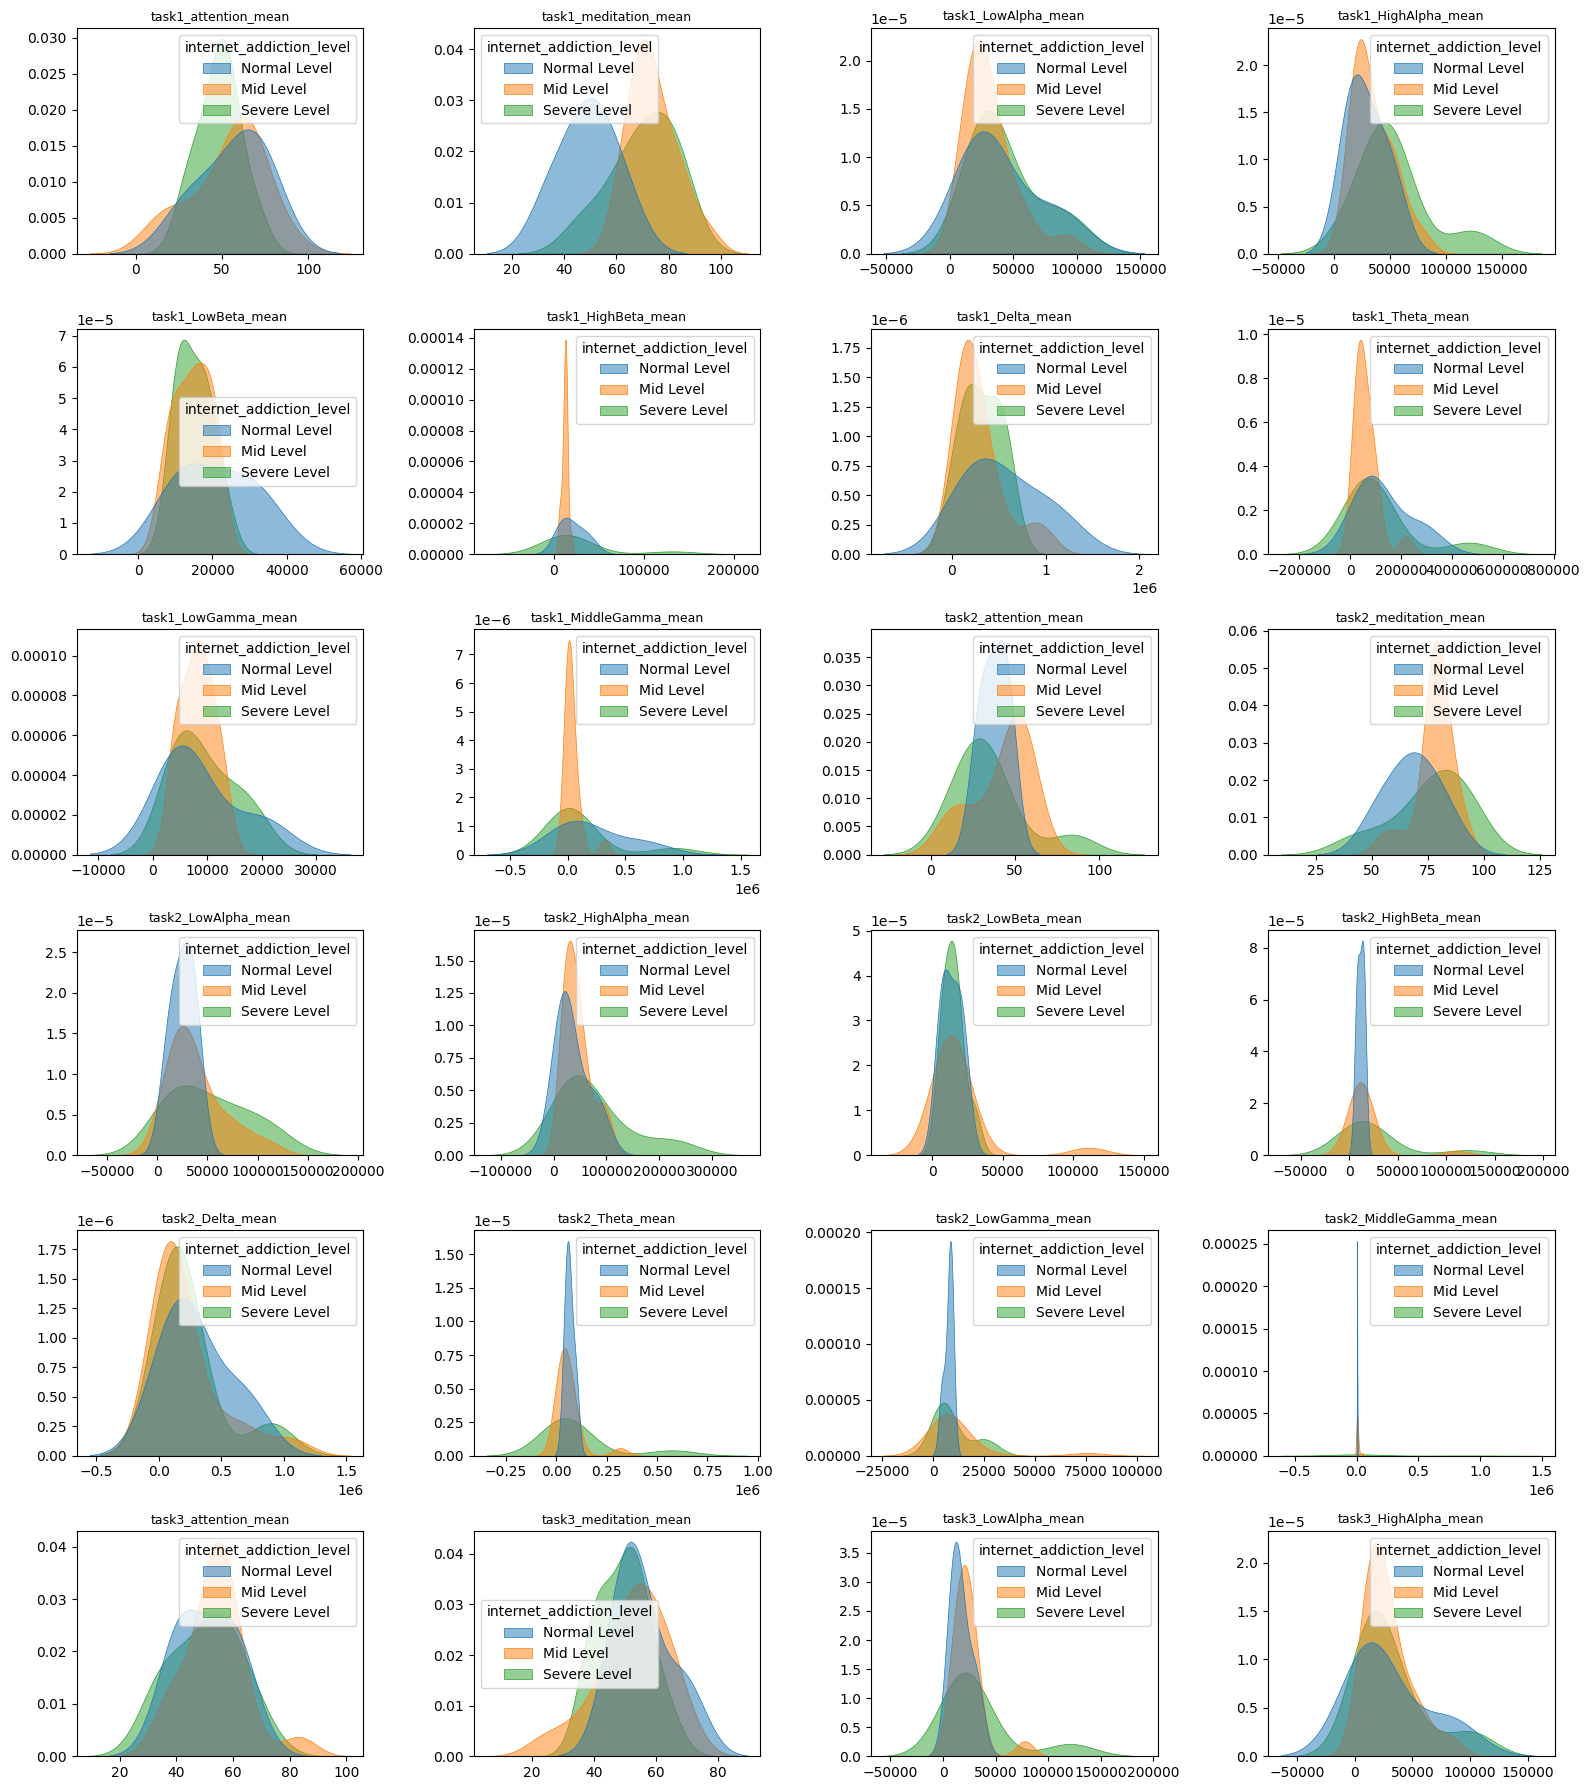

In [19]:
# Plot per-feature distributions (lots of subplots)
feat_candidates = [c for c in df.columns if c.endswith("_mean")]  # tweak pattern
feat_candidates = feat_candidates[:24]  # cap for readability

n = len(feat_candidates)
rows = int(np.ceil(n/4))
plt.figure(figsize=(16, 3*rows))
for i, c in enumerate(feat_candidates, 1):
    plt.subplot(rows, 4, i)
    sns.kdeplot(data=df, x=c, hue=HUE, fill=True, common_norm=False, alpha=0.5, linewidth=0.5)
    plt.title(c, fontsize=9)
    plt.xlabel("")
    plt.ylabel("")
plt.tight_layout()
plt.show()
